In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

# Naive Bayes - Análise de Crédito
O Naive Bayes é um classificador baseado no terorema de Bayes que considera as probabilidades de forma independente. 

In [144]:
#Importação da base de dados.

dataframe = pd.read_csv('Credit.csv')
print('Number of lines: ',dataframe.shape[0])
print('Number of Columns: ',dataframe.shape[1])
print('Name Columns: \n', dataframe.columns)

Number of lines:  1000
Number of Columns:  21
Name Columns: 
 Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [145]:
dataframe.head(4)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good


# Análise.

In [146]:
# Transformação dos atributos categóricos em atributos numéricos.
def Transf_cat_in_num(DATA):
    for i in DATA:
        if(DATA[i].dtype != 'int64'):
            DATA[i] = LabelEncoder().fit_transform(DATA[i])
    return DATA
    
dataframe = Transf_cat_in_num(dataframe)
dataframe.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1


d:\Users\vinicius.azevedo\Documents\ESTUDOS\DataScience\Projetos\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


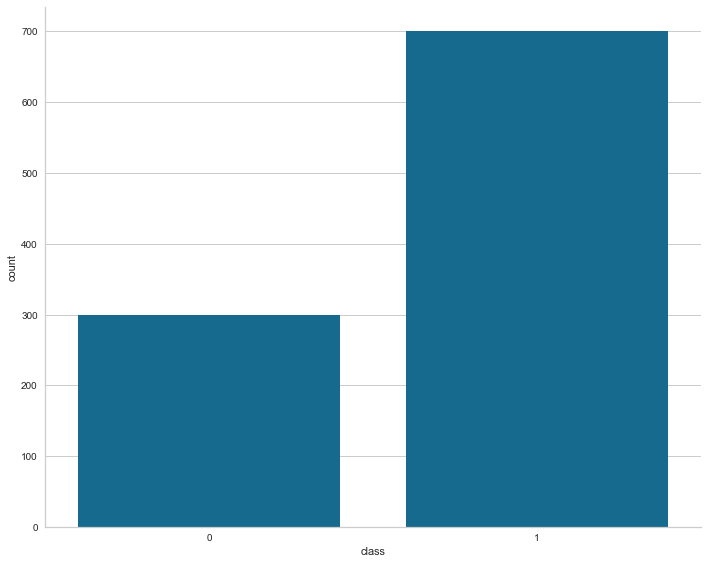

In [147]:
#Verificando valoes catégorigos da variável alvo. 
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(dataframe['class'], color='b', ax=ax)
sns.despine()
plt.tight_layout()

# Predição.

In [148]:
#Separando base de dados em treino e teste
X = dataframe.iloc[:,0:20]
Y = dataframe.iloc[:,20]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [149]:
#Criando modelo
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)
previsao = NaiveBayes.predict(X_test)


# Validando modelo.

In [150]:
data_comparacao = pd.DataFrame({'Valor Real': y_test,'Predict':previsao})
data_comparacao.head(6)

,Valor Real,Predict
993,1,0
859,1,1
298,1,1
553,1,1
672,1,0
971,1,1


In [151]:
confusion = confusion_matrix(y_test,previsao)
confusion
#A linha da diagonal esquerda são os valores que ele acertou e a da diagonal direita dos valores que ele errou.

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [152]:
taxa_acerto = accuracy_score(y_test,previsao)
taxa_erro = 1 - taxa_acerto 
print('Taxa de acerto: ',taxa_acerto)
print('Taxa de erro: ',taxa_erro)

Taxa de acerto:  0.71
Taxa de erro:  0.29000000000000004


<AxesSubplot:xlabel='Predito', ylabel='Ocorreu'>

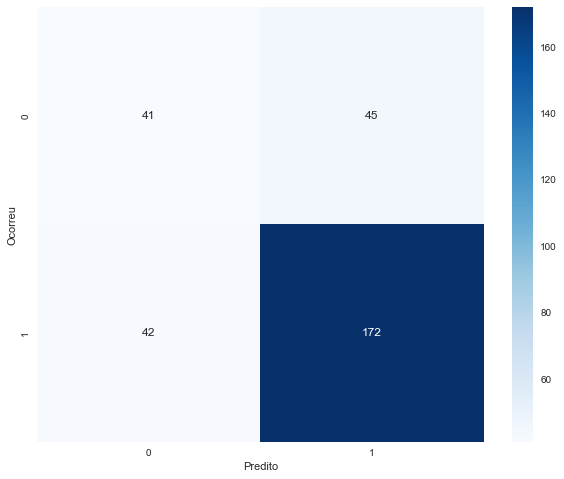

In [153]:
#Vizualizando matriz de confusão 
# v=ConfusionMatrix(GaussianNB())
# v.fit(X_train,y_train)
# v.score(X_test,y_test)
# v.poof
fig, ax = plt.subplots(figsize=(10,8))
conf = pd.crosstab(data_comparacao['Valor Real'], data_comparacao['Predict'], rownames=['Ocorreu'], colnames=['Predito'])
sns.heatmap(conf, annot=True,fmt='d',cmap=plt.cm.Blues)

In [154]:
data_validation = pd.read_csv('NovoCredit.csv')
data_validation.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [155]:
data_validation = Transf_cat_in_num(data_validation)

In [156]:
data_validation.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,0,12,0,0,804,0,0,4,0,0,4,0,38,0,0,1,0,1,0,0


In [157]:
validacao = NaiveBayes.predict(data_validation)
print('Valor da predição',validacao[0])

Valor da predição 1
